Nous Allons D'abord nous interesser au Covid -19


prepare_data.py

In [1]:
import os
import random
from PIL import Image
from shutil import copyfile
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import torch

# === CONFIGURATION ===
COVID_SRC = "/kaggle/input/qatacov19-dataset/QaTa-COV19/QaTa-COV19-v2/Train Set/Images"
NON_COVID_SRC = "/kaggle/input/qatacov19-dataset/QaTa-COV19/Control_Group/Control_Group_I"

DST_DIR = "data"
IMG_SIZE = 224
BATCH_SIZE = 32
VAL_SPLIT = 0.1
TEST_SPLIT = 0.1
SEED = 42

random.seed(SEED)

# === TRANSFORMATIONS ===
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Assuming grayscale, update for RGB if needed
])

# === ÉCHANTILLONNER LES IMAGES ===
def collect_images(src, max_count=None):
    files = [os.path.join(src, f) for f in os.listdir(src)
             if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if max_count:
        files = random.sample(files, min(len(files), max_count))
    return files

# === COPIER VERS DOSSIER STRUCTURÉ ===
def copy_images_to_class_folder(img_list, class_name):
    class_path = os.path.join(DST_DIR, class_name)
    os.makedirs(class_path, exist_ok=True)
    for img in img_list:
        dst = os.path.join(class_path, os.path.basename(img))
        copyfile(img, dst)

# === SPLIT DES DONNÉES ===
def split_dataset(class_folder):
    images = [os.path.join(class_folder, f) for f in os.listdir(class_folder)]
    random.shuffle(images)

    total = len(images)
    val_size = int(total * VAL_SPLIT)
    test_size = int(total * TEST_SPLIT)

    val = images[:val_size]
    test = images[val_size:val_size + test_size]
    train = images[val_size + test_size:]

    return train, val, test

# === DATASET SETUP ===
def prepare_dataset():
    print("Collecting images...")
    covid_imgs = collect_images(COVID_SRC)
    non_covid_imgs = collect_images(NON_COVID_SRC, max_count=len(covid_imgs))

    print("Copying images...")
    copy_images_to_class_folder(covid_imgs, "covid")
    copy_images_to_class_folder(non_covid_imgs, "non_covid")

    print("Splitting dataset...")
    for cls in ["covid", "non_covid"]:
        cls_path = os.path.join(DST_DIR, cls)
        train, val, test = split_dataset(cls_path)

        for split, split_name in zip([train, val, test], ["train", "val", "test"]):
            split_dir = os.path.join(DST_DIR, split_name, cls)
            os.makedirs(split_dir, exist_ok=True)
            for img in split:
                dst = os.path.join(split_dir, os.path.basename(img))
                if not os.path.exists(dst):
                    copyfile(img, dst)

    print("Done.")

# === DATA LOADERS ===
def get_dataloaders():
    prepare_dataset()

    dataloaders = {}
    for split in ["train", "val", "test"]:
        dataset = ImageFolder(os.path.join(DST_DIR, split), transform=transform)
        loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
        dataloaders[split] = loader

    return dataloaders

# === TEST ===
if __name__ == "__main__":
    dataloaders = get_dataloaders()
    print("Samples per set:")
    for split in dataloaders:
        print(f"{split}: {len(dataloaders[split].dataset)} images")


Copying images...
Splitting dataset...
Done.
Samples per set:
train: 19332 images
val: 14642 images
test: 14637 images


train_resnet.py

Copying images...
Splitting dataset...
Done.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 187MB/s] 


 Démarrage de l'entraînement...

Epoch 1/20


100%|██████████| 605/605 [01:29<00:00,  6.75it/s]


Train Loss: 0.4013 | Val Loss: 0.2887 | Val Acc: 89.99%
 Meilleur modèle sauvegardé.

Epoch 2/20


100%|██████████| 605/605 [01:32<00:00,  6.55it/s]


Train Loss: 0.2687 | Val Loss: 0.2345 | Val Acc: 91.07%
 Meilleur modèle sauvegardé.

Epoch 3/20


100%|██████████| 605/605 [01:33<00:00,  6.51it/s]


Train Loss: 0.2350 | Val Loss: 0.2023 | Val Acc: 92.81%
 Meilleur modèle sauvegardé.

Epoch 4/20


100%|██████████| 605/605 [01:31<00:00,  6.60it/s]


Train Loss: 0.2152 | Val Loss: 0.1891 | Val Acc: 93.25%
 Meilleur modèle sauvegardé.

Epoch 5/20


100%|██████████| 605/605 [01:31<00:00,  6.59it/s]


Train Loss: 0.2036 | Val Loss: 0.1802 | Val Acc: 93.72%
 Meilleur modèle sauvegardé.

Epoch 6/20


100%|██████████| 605/605 [01:32<00:00,  6.53it/s]


Train Loss: 0.1942 | Val Loss: 0.1718 | Val Acc: 93.69%

Epoch 7/20


100%|██████████| 605/605 [01:33<00:00,  6.49it/s]


Train Loss: 0.1845 | Val Loss: 0.1635 | Val Acc: 94.14%
 Meilleur modèle sauvegardé.

Epoch 8/20


100%|██████████| 605/605 [01:32<00:00,  6.52it/s]


Train Loss: 0.1831 | Val Loss: 0.1580 | Val Acc: 94.53%
 Meilleur modèle sauvegardé.

Epoch 9/20


100%|██████████| 605/605 [01:32<00:00,  6.54it/s]


Train Loss: 0.1752 | Val Loss: 0.1566 | Val Acc: 94.50%

Epoch 10/20


100%|██████████| 605/605 [01:32<00:00,  6.54it/s]


Train Loss: 0.1728 | Val Loss: 0.1491 | Val Acc: 94.75%
 Meilleur modèle sauvegardé.

Epoch 11/20


100%|██████████| 605/605 [01:31<00:00,  6.63it/s]


Train Loss: 0.1694 | Val Loss: 0.1483 | Val Acc: 94.78%
 Meilleur modèle sauvegardé.

Epoch 12/20


100%|██████████| 605/605 [01:32<00:00,  6.53it/s]


Train Loss: 0.1670 | Val Loss: 0.1456 | Val Acc: 94.82%
 Meilleur modèle sauvegardé.

Epoch 13/20


100%|██████████| 605/605 [01:31<00:00,  6.61it/s]


Train Loss: 0.1652 | Val Loss: 0.1410 | Val Acc: 95.09%
 Meilleur modèle sauvegardé.

Epoch 14/20


100%|██████████| 605/605 [01:32<00:00,  6.57it/s]


Train Loss: 0.1615 | Val Loss: 0.1385 | Val Acc: 95.08%

Epoch 15/20


100%|██████████| 605/605 [01:31<00:00,  6.59it/s]


Train Loss: 0.1586 | Val Loss: 0.1378 | Val Acc: 95.06%

Epoch 16/20


100%|██████████| 605/605 [01:32<00:00,  6.55it/s]


Train Loss: 0.1601 | Val Loss: 0.1348 | Val Acc: 95.32%
 Meilleur modèle sauvegardé.

Epoch 17/20


100%|██████████| 605/605 [01:32<00:00,  6.56it/s]


Train Loss: 0.1569 | Val Loss: 0.1349 | Val Acc: 95.28%

Epoch 18/20


100%|██████████| 605/605 [01:31<00:00,  6.64it/s]


Train Loss: 0.1568 | Val Loss: 0.1321 | Val Acc: 95.27%

Epoch 19/20


100%|██████████| 605/605 [01:32<00:00,  6.53it/s]


Train Loss: 0.1540 | Val Loss: 0.1299 | Val Acc: 95.53%
 Meilleur modèle sauvegardé.

Epoch 20/20


100%|██████████| 605/605 [01:31<00:00,  6.60it/s]


Train Loss: 0.1511 | Val Loss: 0.1279 | Val Acc: 95.59%
 Meilleur modèle sauvegardé.


<ipython-input-2-388bcbfaba6f>:104: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(SAVE_PATH))



 Test Accuracy: 95.67%


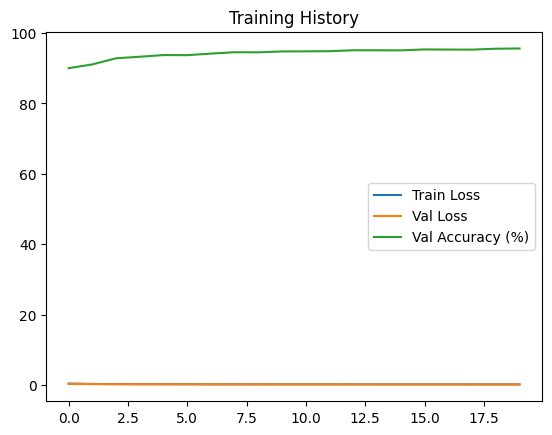

In [2]:
import torch
import torch.nn as nn
from torchvision import models
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

# from prepare_data import get_dataloaders

# === CONFIGURATION ===
NUM_CLASSES = 2
EPOCHS = 20
LEARNING_RATE = 1e-4
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SAVE_PATH = "best_resnet_covid.pth"

# === CHARGER LES DATALOADERS ===
dataloaders = get_dataloaders()
train_loader = dataloaders['train']
val_loader = dataloaders['val']
test_loader = dataloaders['test']

# === MODELE RESNET50 ===
def get_model():
    model = models.resnet50(pretrained=True)
    # Geler toutes les couches sauf la dernière
    for param in model.parameters():
        param.requires_grad = False

    # Remplacer la dernière couche pour classification binaire
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, NUM_CLASSES)
    return model.to(DEVICE)

# === ENTRAÎNEMENT ===
def train(model, criterion, optimizer):
    best_acc = 0.0
    history = {'train_loss': [], 'val_loss': [], 'val_acc': []}

    for epoch in range(EPOCHS):
        print(f"\nEpoch {epoch+1}/{EPOCHS}")
        model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(train_loader):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        val_loss, val_acc = evaluate(model, val_loader, criterion)

        print(f"Train Loss: {epoch_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

        history['train_loss'].append(epoch_loss)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), SAVE_PATH)
            print(" Meilleur modèle sauvegardé.")

    return history

# === ÉVALUATION ===
def evaluate(model, loader, criterion):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_loss = running_loss / len(loader.dataset)
    acc = 100 * correct / total
    return avg_loss, acc

# === ENTRÉE PRINCIPALE ===
if __name__ == "__main__":
    model = get_model()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.fc.parameters(), lr=LEARNING_RATE)

    print(" Démarrage de l'entraînement...")
    history = train(model, criterion, optimizer)

    # Charger le meilleur modèle
    model.load_state_dict(torch.load(SAVE_PATH))
    test_loss, test_acc = evaluate(model, test_loader, criterion)
    print(f"\n Test Accuracy: {test_acc:.2f}%")

    # Affichage des courbes
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.plot(history['val_acc'], label='Val Accuracy (%)')
    plt.legend()
    plt.title("Training History")
    plt.show()


gradcam_utils.py

In [3]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

# === Transformer pour image unique ===
def get_transform():
    return transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])

# === GRAD-CAM pour ResNet50 ===
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model.eval()
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Hook pour gradients
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate(self, input_tensor, class_idx=None):
        output = self.model(input_tensor)
        if class_idx is None:
            class_idx = torch.argmax(output).item()

        self.model.zero_grad()
        class_score = output[:, class_idx]
        class_score.backward()

        # Moyenne des gradients
        pooled_grad = torch.mean(self.gradients, dim=[0, 2, 3])
        activations = self.activations.squeeze(0)

        for i in range(activations.shape[0]):
            activations[i, :, :] *= pooled_grad[i]

        heatmap = torch.mean(activations, dim=0).cpu().numpy()
        heatmap = np.maximum(heatmap, 0)
        heatmap /= heatmap.max()
        return heatmap, class_idx


Fonction pour afficher l’image avec la heatmap Grad-CAMvisualize_gradcam.py

In [4]:
def apply_heatmap_on_image(img_path, heatmap, alpha=0.5):
    # Charge image originale (pour affichage)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap = np.uint8(255 * heatmap)

    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = heatmap_color * alpha + img
    superimposed = np.uint8(superimposed)

    return superimposed


visualize_gradcam.py

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-5-69a238d2cd34>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommen

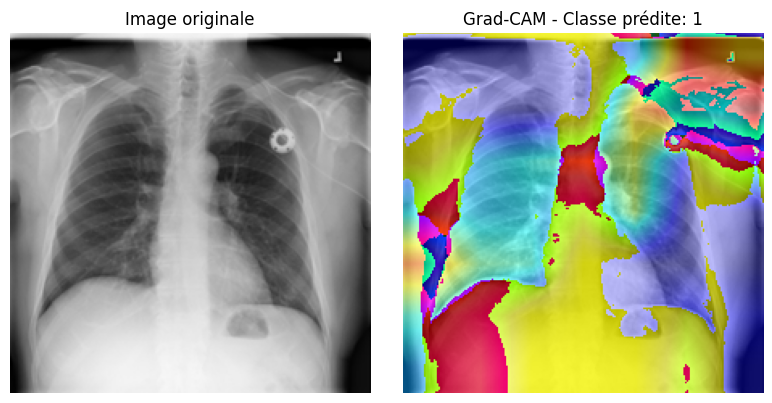

In [5]:
import torch
from torchvision import models
# from gradcam_utils import GradCAM, get_transform, apply_heatmap_on_image
import matplotlib.pyplot as plt
from PIL import Image

# === Charger modèle ===
model = models.resnet50(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, 2)
model.load_state_dict(torch.load("best_resnet_covid.pth", map_location="cpu"))
model.eval()

# === Préparation Grad-CAM ===
target_layer = model.layer4[2].conv3  # Dernière couche de convolution profonde
gradcam = GradCAM(model, target_layer)

# === Image de test ===
img_path = "/kaggle/input/qatacov19-dataset/QaTa-COV19/Control_Group/Control_Group_I/normal_1.png"  # ← change avec un vrai chemin
img = Image.open(img_path).convert("RGB")
transform = get_transform()
input_tensor = transform(img).unsqueeze(0)

# === Génération Grad-CAM ===
heatmap, class_idx = gradcam.generate(input_tensor)

# === Superposition heatmap ===
superimposed_img = apply_heatmap_on_image(img_path, heatmap)

# === Affichage ===
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Image originale")
plt.imshow(img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Grad-CAM - Classe prédite: {class_idx}")
plt.imshow(superimposed_img[..., ::-1])  # BGR → RGB
plt.axis("off")
plt.tight_layout()
plt.show()
